In [ ]:
!pip install tabulate
!pip install pandas
!pip install openpyxl

# 1. 연속 시간 신호

# 3. 연속 시간 주기 신호의 푸리에 급수

## 3.1 정현 신호의 스펙트럼 표현

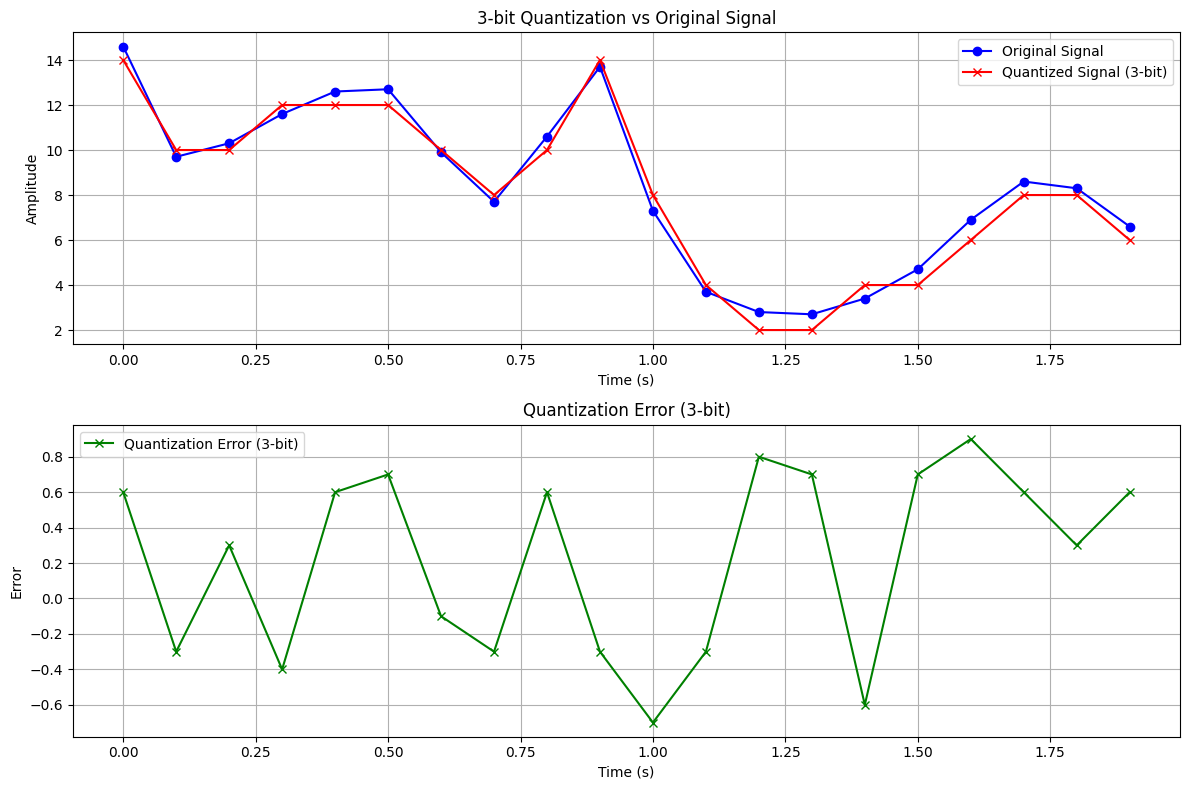

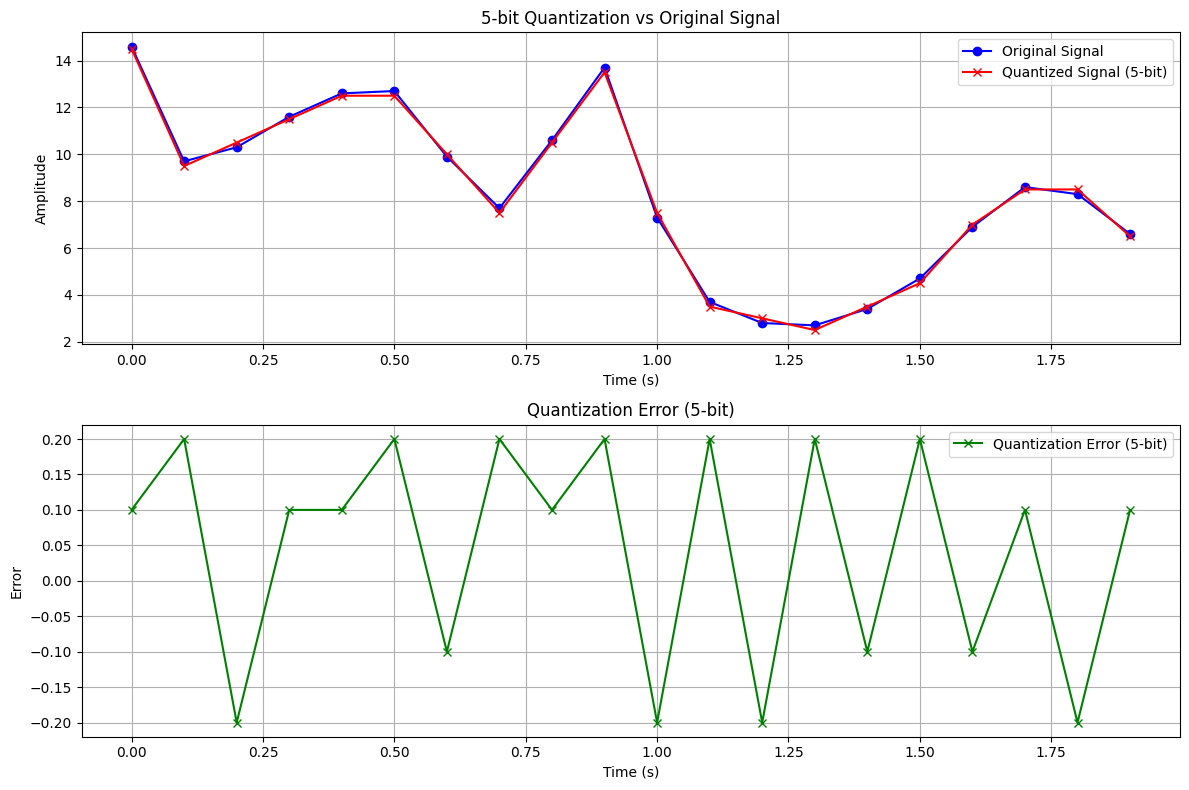

          | Quantized (3-bit) | Quantized(5-bit)
------------------------------------------------
Step size | 2.00             | 0.50      
Time (s) | Original | Quantized Val (3-bit) | Quantized Val(5-bit)
----------------------------------------------------------
0.0        | 14.60     | 14.00              | 14.50          
0.1        | 9.70      | 10.00              | 9.50           
0.2        | 10.30     | 10.00              | 10.50          
0.3        | 11.60     | 12.00              | 11.50          
0.4        | 12.60     | 12.00              | 12.50          
0.5        | 12.70     | 12.00              | 12.50          
0.6        | 9.90      | 10.00              | 10.00          
0.7        | 7.70      | 8.00               | 7.50           
0.8        | 10.60     | 10.00              | 10.50          
0.9        | 13.70     | 14.00              | 13.50          
1.0        | 7.30      | 8.00               | 7.50           
1.1        | 3.70      | 4.00               | 3.50  

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 신호 데이터
x_t = np.array([14.6, 9.7, 10.3, 11.6, 12.6, 12.7, 9.9, 7.7, 10.6, 13.7,
                7.3, 3.7, 2.8, 2.7, 3.4, 4.7, 6.9, 8.6, 8.3, 6.6])

# # 신호의 최소값과 최대값
# min_val = np.min(x_t)
# max_val = np.max(x_t)

min_val = 0
max_val = 16

def quantize(signal, bits, min_val, max_val):
    # 1. 양자화 레벨 수(0 ~ levels, levels + 1 개)
    levels = 2 ** bits - 1

    # 2. 양자화 간격 계산
    quantization_step = (max_val - min_val) / (levels + 1)

    # 3. QL, 양자화 레벨 계산
    quantization_levels = np.round((signal - min_val) / quantization_step)

    # 4. QL * quantization_step + min_val: QV, 양자화 값
    quantized_signal = quantization_levels * quantization_step + min_val

    return quantized_signal, quantization_levels, quantization_step

# 3비트와 5비트 양자화
quantized_3bit_val, quantized_3bit_Lv, step_size_3bit = quantize(x_t, 3, min_val, max_val)

quantized_5bit_val, quantized_5bit_Lv, step_size_5bit = quantize(x_t, 5, min_val, max_val)

# 양자화 오차 계산
error_3bit = x_t - quantized_3bit_val
error_5bit = x_t - quantized_5bit_val

# 시각화
time = np.arange(0, len(x_t) * 0.1, 0.1)  # 시간 축 (0초부터 0.1초 간격으로)

plt.figure(figsize=(12, 8))

# 원본 신호와 양자화된 신호 비교 (3비트)
plt.subplot(2, 1, 1)
plt.plot(time, x_t, label='Original Signal', marker='o', color='b')
plt.plot(time, quantized_3bit_val, label='Quantized Signal (3-bit)', marker='x', color='r')
plt.title('3-bit Quantization vs Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# 양자화 오차 (3비트)
plt.subplot(2, 1, 2)
plt.plot(time, error_3bit, label='Quantization Error (3-bit)', marker='x', color='g')
plt.title('Quantization Error (3-bit)')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 5비트 양자화에 대한 시각화 (별도 플롯)
plt.figure(figsize=(12, 8))

# 원본 신호와 양자화된 신호 비교 (5비트)
plt.subplot(2, 1, 1)
plt.plot(time, x_t, label='Original Signal', marker='o', color='b')
plt.plot(time, quantized_5bit_val, label='Quantized Signal (5-bit)', marker='x', color='r')
plt.title('5-bit Quantization vs Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# 양자화 오차 (5비트)
plt.subplot(2, 1, 2)
plt.plot(time, error_5bit, label='Quantization Error (5-bit)', marker='x', color='g')
plt.title('Quantization Error (5-bit)')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 각 지점마다 정확한 값 출력
print('          | Quantized (3-bit) | Quantized(5-bit)')
print('------------------------------------------------')
print(f'Step size | {step_size_3bit:<10.2f}       | {step_size_5bit:<10.2f}')
print("Time (s) | Original | Quantized Val (3-bit) | Quantized Val(5-bit)")
print("----------------------------------------------------------")
for i in range(len(x_t)):
    print(f"{time[i]:<10.1f} | {x_t[i]:<8.2f}  | {quantized_3bit_val[i]:<18.2f} | {quantized_5bit_val[i]:<15.2f}")


print("Time (s) | Quantized Lv(3-bit) | Quantized Lv (5-bit) | Binary Lv(3-bit) | Binary Lv(5-bit)")
print("------------------------------------------------------------------------------------------------")
for i in range(len(x_t)):
    binary_lv_3bit = format(int(quantized_3bit_Lv[i]), '03b')  # 3비트 이진수
    binary_lv_5bit = format(int(quantized_5bit_Lv[i]), '05b')  # 5비트 이진수
    print(f"{time[i]:<10.1f} | {quantized_3bit_Lv[i]:<18.2f} | {quantized_5bit_Lv[i]:<15.2f} | {binary_lv_3bit:<15} | {binary_lv_5bit:<15}")


In [5]:
from tabulate import tabulate

# 각 지점마다 정확한 값 출력
# 이진수 변환
binary_lv_3bit = [format(int(lv), '03b') for lv in quantized_3bit_Lv]
binary_lv_5bit = [format(int(lv), '05b') for lv in quantized_5bit_Lv]


# 데이터 준비
data = []
for i in range(len(x_t)):
    data.append([
        f"{time[i]:<10.1f}",
        f"{x_t[i]:<8.2f}",
        f"{quantized_3bit_val[i]:<18.2f}",
        f"{quantized_5bit_val[i]:<15.2f}",
        f"{binary_lv_3bit[i]:<10}",
        f"{quantized_3bit_Lv[i]:<18.2f}",
        f"{binary_lv_5bit[i]:<10}",
        f"{quantized_5bit_Lv[i]:<15.2f}",
    ])

# 표 출력
headers = ["Time (s)", "Original", "Quantized Val (3-bit)", "Quantized Val (5-bit)", "Binary Lv (3-bit)", "Quantized Lv (3-bit)", "Binary Lv (5-bit)", "Quantized Lv (5-bit)"]
print(tabulate(data, headers=headers, tablefmt="grid"))

+------------+------------+-------------------------+-------------------------+---------------------+------------------------+---------------------+------------------------+
|   Time (s) |   Original |   Quantized Val (3-bit) |   Quantized Val (5-bit) |   Binary Lv (3-bit) |   Quantized Lv (3-bit) |   Binary Lv (5-bit) |   Quantized Lv (5-bit) |
+============+============+=========================+=========================+=====================+========================+=====================+========================+
|        0   |       14.6 |                      14 |                    14.5 |          111        |                      7 |          11101      |                     29 |
+------------+------------+-------------------------+-------------------------+---------------------+------------------------+---------------------+------------------------+
|        0.1 |        9.7 |                      10 |                     9.5 |          101        |                      5 |    

In [6]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    'Time (s)': np.arange(0, len(x_t) * 0.1, 0.1),
    'Original': x_t,
    'Quantized Val (3-bit)': quantized_3bit_val,
    'Quantized Lv (3-bit)': quantized_3bit_Lv,
    'Binary Lv (3-bit)': binary_lv_3bit,
    'Quantized Val (5-bit)': quantized_5bit_val,
    'Quantized Lv (5-bit)': quantized_5bit_Lv,
    'Binary Lv (5-bit)': binary_lv_5bit,
})

# 엑셀 파일로 Google Drive에 저장
file_path = '/content/drive/My Drive/quantization_results.xlsx'  # 저장할 경로
df.to_excel(file_path, index=False)

print(f"Excel 파일로 저장되었습니다: {file_path}")

Excel 파일로 저장되었습니다: /content/drive/My Drive/quantization_results.xlsx
